## Imports

In [1]:
import pandas as pd

from fedot_ind import fedot_api
from sklearn.model_selection import train_test_split

## Opening Data

In [2]:
data = pd.read_csv('scoring_train.csv', index_col=0)

In [3]:
data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,target
ID,,,,,,,,,,,
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  20000 non-null  float64
 1   age                                   20000 non-null  int64  
 2   NumberOfTime30.59DaysPastDueNotWorse  20000 non-null  int64  
 3   DebtRatio                             20000 non-null  float64
 4   MonthlyIncome                         15979 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       20000 non-null  int64  
 6   NumberOfTimes90DaysLate               20000 non-null  int64  
 7   NumberRealEstateLoansOrLines          20000 non-null  int64  
 8   NumberOfTime60.89DaysPastDueNotWorse  20000 non-null  int64  
 9   NumberOfDependents                    19452 non-null  float64
 10  target                                20000 non-null  int64  
dtypes: float64(4), 

In [5]:
target = 'target'

Split data for validation

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.3)

In [7]:
print('Shape of train', X_train.shape, 'and test' , X_test.shape)

Shape of train (14000, 10) and test (6000, 10)


## Experiments settings

In [8]:
TIMEOUT = 15
N_JOBS = 1
EARLY_STOPPING_TIMEOUT = 45
METRIC = 'roc_auc'
TUNING = False

## Fedot (current master)

In [9]:
automl = fedot_api.Fedot(problem='classification', timeout=TIMEOUT, n_jobs=N_JOBS, metric=METRIC, with_tuning=TUNING, early_stopping_timeout=EARLY_STOPPING_TIMEOUT, show_progress=True)

In [10]:
automl.fit(features=X_train, target=y_train)

2024-01-09 17:23:55,618 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 30.4 MiB, max: 53.0 MiB
2024-01-09 17:23:55,622 - ApiComposer - Initial pipeline was fitted in 3.8 sec.
2024-01-09 17:23:55,624 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2024-01-09 17:23:55,636 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 15 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling'].
2024-01-09 17:23:55,704 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2024-01-09 17:24:58,542 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2024-01-09 17:33:14,459 - MultiprocessingDispatcher - 18 individuals out of 21 in previous population were evaluated successfully.
2024-01-09 17:33:14,500 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 0/10000 [09:18<?, ?gen/s]

2024-01-09 17:33:14,609 - ApiComposer - Model generation finished


2024-01-09 17:33:18,045 - FEDOT logger - Final pipeline was fitted
2024-01-09 17:33:18,048 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [rf, scaling]}
rf - {'n_jobs': 1, 'criterion': 'entropy', 'max_features': 0.18494281889317088, 'min_samples_split': 7, 'min_samples_leaf': 6, 'bootstrap': True}
scaling - {}
2024-01-09 17:33:18,050 - MemoryAnalytics - Memory consumption for finish in main session: current 36.3 MiB, max: 84.2 MiB


{'depth': 2, 'length': 2, 'nodes': [rf, scaling]}

In [11]:
automl.predict(features=X_test)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [12]:
automl.get_metrics(target=y_test)

{'roc_auc': 0.85}

In [13]:
fedot_industrial_report = automl.return_report()

fedot_industrial_report.head(10)

,days,hours,minutes,seconds,milliseconds
Data Definition (fit),0,0,0,1,257
Applying Recommendation (fit),0,0,0,0,0
Data Preprocessing,0,0,1,45,269
Fitting,0,0,9,27,377
Tuning (composing),0,0,0,0,0
Tuning (post),0,0,0,0,0
Data Definition (predict),0,0,0,0,124
Applying Recommendation (predict),0,0,0,0,0
Predicting,0,0,0,0,181


In [14]:
print(automl.history.get_leaderboard())

Position | Fitness | Generation | Graph
  0,  -0.8561,    g2-i0, (/n_scaling;)/n_rf_{'n_jobs': 1, 'criterion': 'entropy', 'max_features': 0.18494281889317088, 'min_samples_split': 7, 'min_samples_leaf': 6, 'bootstrap': True}
 10,  -0.8511,   g1-i10, (/n_scaling;)/n_lgbm_{'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'n_jobs': 1, 'verbose': -1}
  1,   -0.849,    g1-i1, /n_catboost_{'allow_writing_files': False, 'verbose': False, 'iterations': 1000, 'use_eval_set': False, 'use_best_model': False, 'early_stopping_rounds': None, 'n_jobs': 1}
  2,  -0.8481,    g1-i2, (/n_poly_features;)/n_catboost_{'allow_writing_files': False, 'verbose': False, 'iterations': 1000, 'use_eval_set': False, 'use_best_model': False, 'early_stopping_rounds': None, 'n_jobs': 1}
 15,  -0.8478,   g1-i15, (/n_scaling;)/n_catboost_{'allow_writing_files': False, 'verbose': False, 'iterations': 1000, 'use_eval_set': False, 'use_best_model'

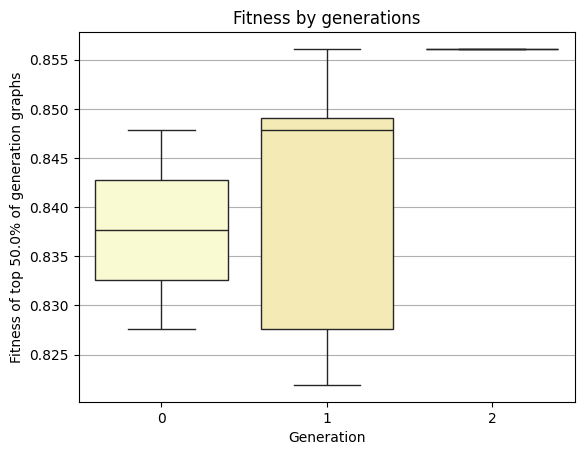

In [15]:
automl.history.show.fitness_box(best_fraction=0.5, dpi=100)

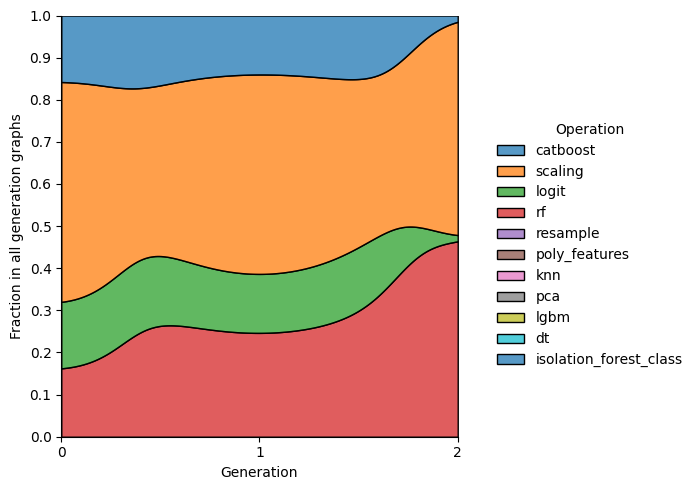

In [16]:
automl.history.show.operations_kde(dpi=100)

## Fedot with use_auto_preprocessing (current master)

In [17]:
automl = fedot_api.Fedot(problem='classification', timeout=TIMEOUT, n_jobs=N_JOBS, metric=METRIC, with_tuning=TUNING, early_stopping_timeout=EARLY_STOPPING_TIMEOUT, use_auto_preprocessing=True)

In [18]:
automl.fit(features=X_train, target=y_train)

2024-01-09 17:33:20,728 - ApiDataProcessor - Preprocessing data
2024-01-09 17:33:20,730 - ApiDataProcessor - Train Data (Original) Memory Usage: 1.07 MB Data Shapes: ((14000, 10), (14000, 1))
2024-01-09 17:33:21,732 - ApiDataProcessor - Train Data (Processed) Memory Usage: 5.34 MB Data Shape: ((14000, 50), (14000, 1))
2024-01-09 17:33:21,734 - ApiDataProcessor - Data preprocessing runtime = 0:00:01.006088
2024-01-09 17:33:24,263 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 15.9 MiB, max: 36.3 MiB
2024-01-09 17:33:24,265 - ApiComposer - Initial pipeline was fitted in 2.5 sec.
2024-01-09 17:33:24,267 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2024-01-09 17:33:24,276 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 15 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'norm

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2024-01-09 17:34:08,034 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2024-01-09 17:39:58,352 - MultiprocessingDispatcher - 20 individuals out of 21 in previous population were evaluated successfully.
2024-01-09 17:43:56,287 - MultiprocessingDispatcher - 15 individuals out of 15 in previous population were evaluated successfully.
2024-01-09 17:44:43,927 - MultiprocessingDispatcher - 3 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|          | 1/10000 [11:19<1887:34:01, 679.59s/gen]

2024-01-09 17:44:43,978 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [11:19<1887:41:58, 679.64s/gen]

2024-01-09 17:44:44,071 - ApiComposer - Model generation finished


2024-01-09 17:44:44,516 - FEDOT logger - Final pipeline was fitted
2024-01-09 17:44:44,517 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [logit, lgbm, scaling]}
logit - {}
lgbm - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'n_jobs': 1, 'verbose': -1}
scaling - {}
2024-01-09 17:44:44,519 - MemoryAnalytics - Memory consumption for finish in main session: current 21.3 MiB, max: 78.8 MiB


{'depth': 3, 'length': 3, 'nodes': [logit, lgbm, scaling]}

In [19]:
automl.predict(features=X_test)

2024-01-09 17:44:44,641 - ApiDataProcessor - Preprocessing data
2024-01-09 17:44:44,643 - ApiDataProcessor - Test Data (Original) Memory Usage: 48.0 B Data Shapes: ((6000, 10), (14000, 1))
2024-01-09 17:44:44,717 - ApiDataProcessor - Test Data (Processed) Memory Usage: 48.0 B Data Shape: ((6000, 50), (14000, 1))
2024-01-09 17:44:44,719 - ApiDataProcessor - Data preprocessing runtime = 0:00:00.076037


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [20]:
automl.get_metrics(target=y_test)

{'roc_auc': 0.85}

In [21]:
fedot_industrial_report = automl.return_report()

fedot_industrial_report.head(10)

,days,hours,minutes,seconds,milliseconds
Data Definition (fit),0,0,0,1,157
Applying Recommendation (fit),0,0,0,0,0
Data Preprocessing,0,0,0,1,85
Fitting,0,0,11,22,781
Tuning (composing),0,0,0,0,0
Tuning (post),0,0,0,0,0
Data Definition (predict),0,0,0,0,108
Applying Recommendation (predict),0,0,0,0,0
Predicting,0,0,0,0,48


In [22]:
print(automl.history.get_leaderboard())

Position | Fitness | Generation | Graph
  0,  -0.8506,    g3-i0, ((/n_scaling;)/n_lgbm_{'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'n_jobs': 1, 'verbose': -1};)/n_logit
 19,  -0.8506,   g2-i19, ((/n_scaling;)/n_lgbm_{'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100, 'n_jobs': 1, 'verbose': -1};)/n_logit_{'C': 2.34694540613852}
 17,  -0.8482,   g2-i17, (/n_normalization;)/n_catboost_{'allow_writing_files': False, 'verbose': False, 'iterations': 1000, 'use_eval_set': False, 'use_best_model': False, 'early_stopping_rounds': None, 'n_jobs': 1}
 15,  -0.8471,   g2-i15, (/n_scaling;)/n_catboost_{'allow_writing_files': False, 'verbose': False, 'iterations': 1000, 'use_eval_set': False, 'use_best_model': False, 'early_stopping_rounds': None, 'n_jobs': 1}
  2,  -0.8432,    g2-i2, ((/n_scaling;)/n_lgbm_{'num_leaves': 32, 'colsample_bytre

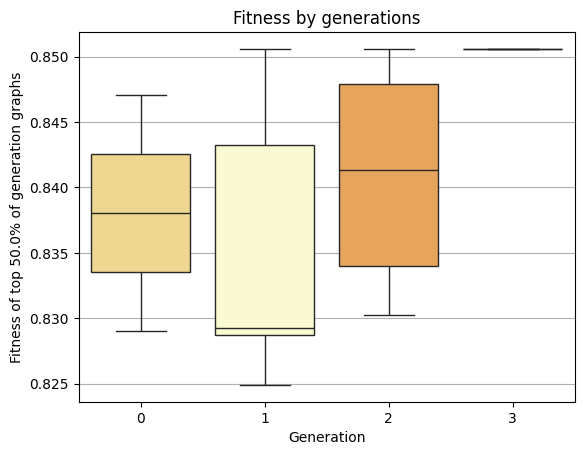

In [23]:
automl.history.show.fitness_box(best_fraction=0.5, dpi=100)

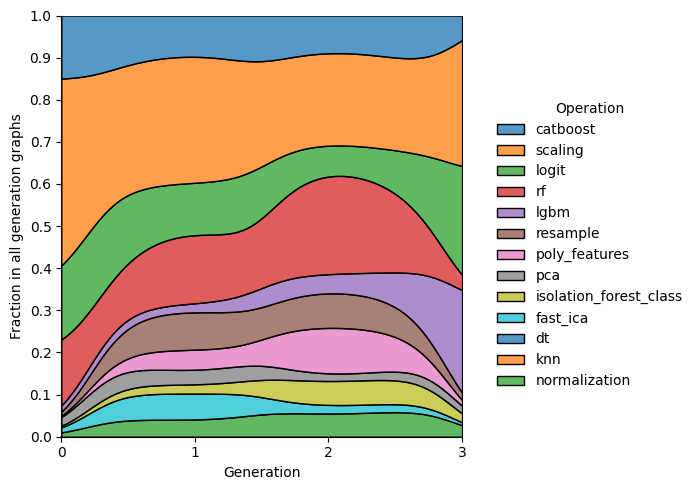

In [24]:
automl.history.show.operations_kde(dpi=100)